<h1><center>EARTH 468: HW02</center></h1>  

<h6>Submitted by: Prithvi Thakur</h6>
<h6>Email: prith@umich.edu</h6>

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
from scipy import io
import seaborn as sns
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#sns.set(color_codes=True)
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

In [2]:
HTML('''
<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">[Toggle Code]</a>
''')

<h3>Problem 1 </h3>

$$
\begin{aligned}
system\ A: &u = u_0 + tv\\
system\ B: &u = u_0 + at^2 + tv\\
system\ C: &u = u_0 + at^2 + tv + A_2cos(t\pi) + A_1sin(t\pi)\\
system\ D: &u = u_0 + at^2 + tv + A_2cos(t\pi) + S_2cos(2t\pi) + A_1sin(t\pi) + S_1sin(2t\pi)\\
\end{aligned}
$$  
  
20 data points. Error on all data = $1.0$  
  
The chi-squared values are:
$$
\begin{aligned}
system\ A:\ &\chi^{2}_{obs} = 56.53\\
system\ B:\ &\chi^{2}_{obs} = 23.32\\
system\ C:\ &\chi^{2}_{obs} = 9.99\\
system\ D:\ &\chi^{2}_{obs} = 0.28\\
\end{aligned}
$$ 

<h3>(a) Model parameters and degrees of freedom</h3>

The degrees of freedom is the difference number of observations and the number of parameters to be estimated:
  
  
  System  |       Model Parameters         | Degrees of freedom | $\chi^2$ values
:--------:|:---------------------------:   |:------------------:| :------:
 System A | $u_0, v$                       | $20 - 2 = 18$      | 56.53
 System B | $u_0, a, v$                    | $20 - 3 = 17$      | 23.32
 System C | $u_0, a, v, A_1, A_2$          | $20 - 5 = 15$      | 9.99
 System D | $u_0, a, v, A_1, A_2, S_1, S_2$| $20 - 7 = 13$      | 0.28


<h3>(b) Reduced $\chi^2$</h3>

|  System  | Reduced $\chi^2$                
|:--------:|:---------------------------:
| System A | 56.53 / 18 = 3.14
| System B | 23.32 / 17 = 1.37                
| System C | 9.99 / 15  =  0.67     
| System D | 0.28 / 13  = 0.02


<h3>(c) Model fit</h3>

System A: Since the reduced $\chi^2$ is much greater than 1, the model described is underfitting the data, which means that the error variance has been underestimated.  
  
System B: The reduced $\chi^2$ is closer to 1, implying that the model almost correctly captures the observations and the error variance has been slightly underestimated.  
  
System C: The reduced $\chi^2$ is close to 1, but less than 1, which implies that this model is overfitting the data, therefore, the error variance has been slightly overestimated.  
  
System D: The reduced $\chi^2$ is much less than 1, which implies that this model is vastly overfitting the data, therefore, the error variance has been overestimated or the model is improperly fitting the noise.  
  
Therefore, system C has the best estimate of errors, and the ideal model lies somewhere between system B and system C.

<h3>(d)</h3>

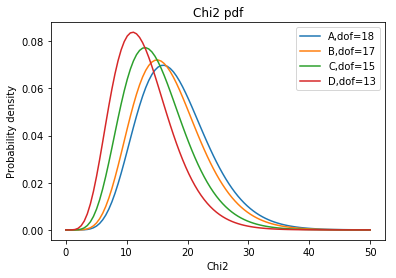

Likelihood of best-fit chi2 for A: 2.68e-06
Likelihood of best-fit chi2 for B: 3.08e-02
Likelihood of best-fit chi2 for C: 6.28e-02
Likelihood of best-fit chi2 for D: 3.04e-08


Likelihood of chi2 expected for A: 6.59e-02
Likelihood of chi2 expected for B: 6.78e-02
Likelihood of chi2 expected for C: 7.20e-02
Likelihood of chi2 expected for D: 7.72e-02


In [28]:
A = 18;
B = 17;
C = 15;
D = 13;

chi2_A = 56.53
chi2_B = 23.32
chi2_C = 9.99
chi2_D = 0.28

fig, ax = plt.subplots(1,1)

x = np.linspace(0, 50, num=100);
ax.plot(x,stats.chi2.pdf(x, A), label='A,dof=18');
ax.plot(x,stats.chi2.pdf(x, B), label='B,dof=17');
ax.plot(x,stats.chi2.pdf(x, C), label='C,dof=15');
ax.plot(x,stats.chi2.pdf(x, D), label='D,dof=13');
ax.set_title('Chi2 pdf')
ax.set_ylabel('Probability density')
ax.set_xlabel('Chi2')
plt.legend()
plt.show()

print("Likelihood of best-fit chi2 for A: %.2e" %stats.chi2.pdf(chi2_A, A))
print("Likelihood of best-fit chi2 for B: %.2e" %stats.chi2.pdf(chi2_B, B))
print("Likelihood of best-fit chi2 for C: %.2e" %stats.chi2.pdf(chi2_C, C))
print("Likelihood of best-fit chi2 for D: %.2e" %stats.chi2.pdf(chi2_D, D))

print("\n\nLikelihood of chi2 expected for A: %.2e" %stats.chi2.pdf(A, A))
print("Likelihood of chi2 expected for B: %.2e" %stats.chi2.pdf(B, B))
print("Likelihood of chi2 expected for C: %.2e" %stats.chi2.pdf(C, C))
print("Likelihood of chi2 expected for D: %.2e" %stats.chi2.pdf(D, D))

System C has the maximum likelihood of the best-fit $\chi^2$, which is in coherence with the conclusion from part C.   
  
The likelihood of the expected $\chi^2$ for system B and C are closer to the likelihood of best-fit $\chi^2$, whereas the likelihood of expected $\chi^2$ is much higher for systems A and D, which makes sense because they do not capture the data as good as systems B and C.

<h3>(e)</h3>

In [16]:
cdf_A = stats.chi2.cdf(chi2_A, 18) 
cdf_B = stats.chi2.cdf(chi2_B, 17)
cdf_C = stats.chi2.cdf(chi2_C, 15)
cdf_D = stats.chi2.cdf(chi2_D, 13)

print("The chi2 cumulative pdf of A is %.2e" %cdf_A)
print("The chi2 cumulative pdf of B is %.2e" %cdf_B)
print("The chi2 cumulative pdf of C is %.2e" %cdf_C)
print("The chi2 cumulative pdf of D is %.2e" %cdf_D)

The chi2 cumulative pdf of A is 1.00e+00
The chi2 cumulative pdf of B is 8.61e-01
The chi2 cumulative pdf of C is 1.80e-01
The chi2 cumulative pdf of D is 1.33e-09


The cumulative probability distribution function represents the probability that the $\chi^2$ will take values less than the cdf. Therefore, any measurement of $\chi^2$ would be always less than the system A, and always greater than the system D. These two extreme cases represent the end member models that explain the given data, in this case, system A represents the data without any error variances, and system D represents the data with every possible error variance.

<h3>(f)</h3>

In [27]:
chi2e = lambda chi2_obs, e: (chi2_obs)/(15*e**2)

print("Chi2 per degrees of freedom for system C with error of 0.6  = %.2f" %chi2e(chi2_C, 0.6))
print("Chi2 per degrees of freedom for system C with error of 0.3  = %.2f" %chi2e(chi2_C, 0.3))
print("Chi2 per degrees of freedom for system C with error of 0.15 = %.2f" %chi2e(chi2_C, 0.15))
print("Chi2 per degrees of freedom for system C with error of 0.05 = %.2f" %chi2e(chi2_C, 0.05))

Chi2 per degrees of freedom for system C with error of 0.6  = 1.85
Chi2 per degrees of freedom for system C with error of 0.3  = 7.40
Chi2 per degrees of freedom for system C with error of 0.15 = 29.60
Chi2 per degrees of freedom for system C with error of 0.05 = 266.40


We see that the system C was initially overfitting the data, but as we systematically decrease the errors, the system begins underfitting the data more and more. This implies that the error is underestimated, and the value of $\frac{\chi^2}{\nu}$ tells us that.